# Dataset information

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('IRIS.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [80]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
134,6.1,2.6,5.6,1.4,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica


In [81]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [82]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [83]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
df.duplicated().sum()

np.int64(3)

In [85]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

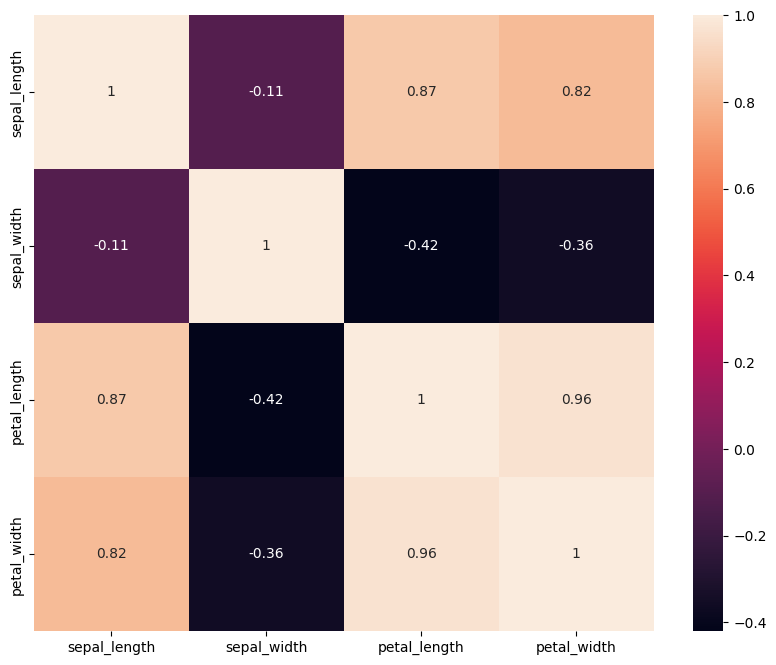

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

## Decision Tree Classifier


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df.drop('species', axis=1, inplace=False)
y = df['species']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
for col in X.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

### Label Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
encoder = LabelEncoder()
y_train_arr = encoder.fit_transform(y_train)
y_test_arr = encoder.transform(y_test)

In [100]:
y_train_arr

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [101]:
y_test_arr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [102]:
encoder.inverse_transform([0, 1, 2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [103]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [104]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train_arr)

DecisionTreeClassifier(criterion='entropy')

In [105]:
dtc.score(X_train, y_train_arr)

1.0

In [106]:
dtc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [107]:
accuracy_score(y_test_arr, dtc.predict(X_test))

1.0

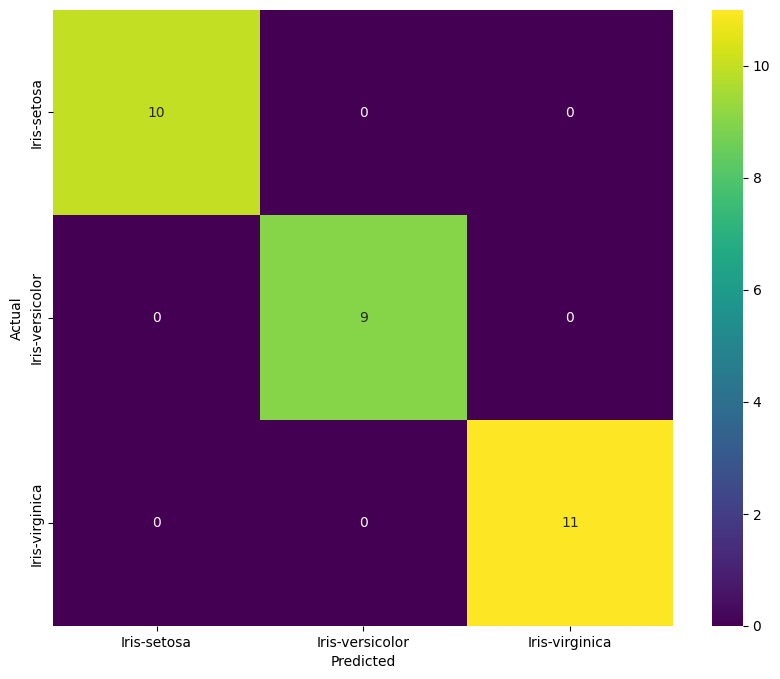

In [108]:
g = confusion_matrix(y_test_arr, dtc.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(g, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5, 2.5], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.yticks([0.5, 1.5, 2.5], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [109]:
print(classification_report(y_test_arr, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



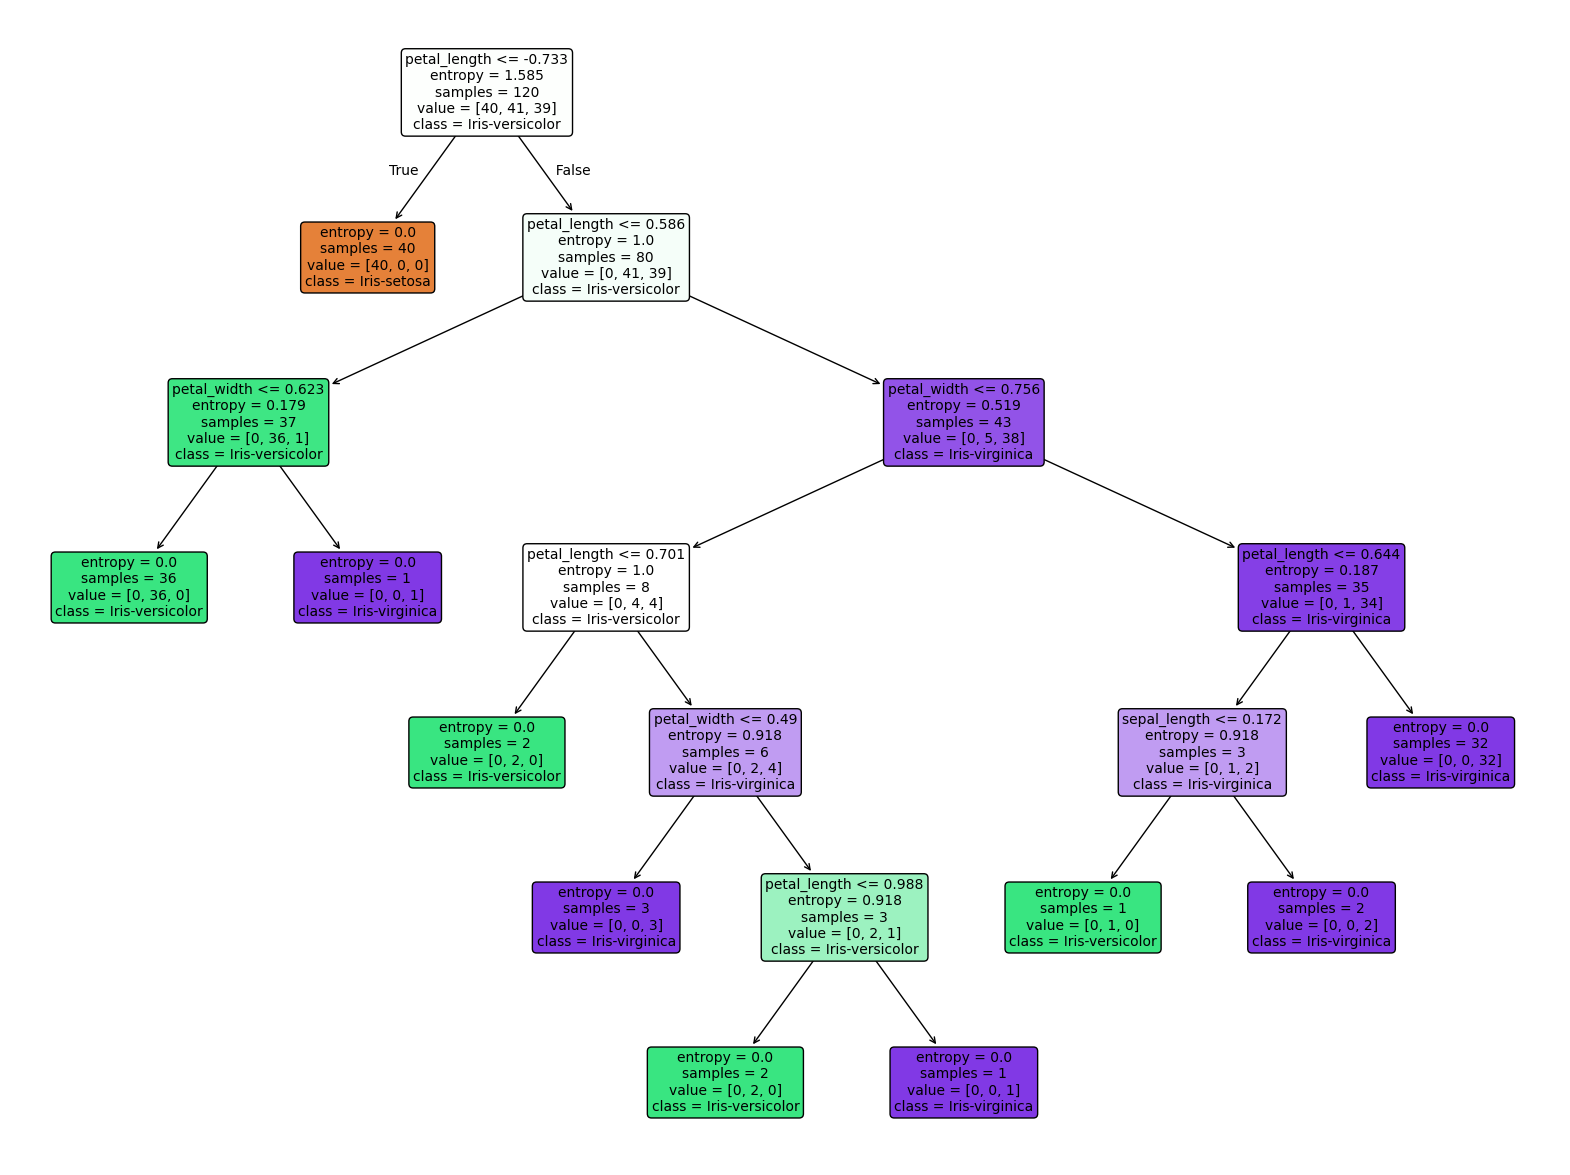

In [111]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 15))  
plot_tree(dtc, 
          feature_names=df.columns[:-1],
          class_names=df['species'].unique(), 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()